<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6.5%>
                    <b>Salary Prediction of MBA Students
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### DATA DESCRIPTION: 
The data set consists of complete educational details of students right from their
schooling to MBA and previous work experience. Our main objective is to predict the Salary of the students
based on the info available. The data set consists of 391 observations and 19 variables.

### ATTRIBUTES:

SlNo - ID of the student

Gender - Gender of Student

Percent_SSC - Percentage of marks scored in SSC

Board_SSC - Types of Boards in SSC


Percent_HSC - Percentage of marks scored in HSC

Board_HSC - Types of Boards in HSC

Stream_HSC - Specialization in HSC

Percent Degree - Percentage of marks scored in Degree

Course_Degree - Different courses in degree

Experience_Yrs - Work Experience of the Students

Entrance_Test - Test which students give for MBA college Entrance

Percentile_ET - Percentage of marks scored in Entrance_Test


Percent_MBA - Percentage of marks scored in MBA

Specialization_MBA - Specialization in MBA

Marks Communication - Percentage of marks scored in Communication

Marks_Projectwork - Percentage of marks scored in Project Work


Marks_BOCA - Percentage of marks scored by students in Extra Curricular activities

Placement - Whether Student got placed or not


Salary - Salary of students (target)


### Loading necessary libraries

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
sns.color_palette('terrain')
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Reading the Dataset

In [2]:
df = pd.read_excel('MBA Students Salary.xlsx')
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


### Data Understanding:

In [3]:
df.shape

(391, 19)

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           The dataset has 391 records and 19 attributes.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 391 non-null    int64  
 1   Gender               391 non-null    object 
 2   Percent_SSC          391 non-null    float64
 3   Board_SSC            391 non-null    object 
 4   Percent_HSC          391 non-null    float64
 5   Board_HSC            391 non-null    object 
 6   Stream_HSC           391 non-null    object 
 7   Percent_Degree       391 non-null    float64
 8   Course_Degree        391 non-null    object 
 9   Experience_Yrs       391 non-null    int64  
 10  Entrance_Test        324 non-null    object 
 11  Percentile_ET        391 non-null    float64
 12  Percent_MBA          391 non-null    float64
 13  Specialization_MBA   391 non-null    object 
 14  Marks_Communication  391 non-null    int64  
 15  Marks_Projectwork    391 non-null    int

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           The data types are identified correctly.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

###### Number of Numerical & Categorical Columns:

In [5]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)

print('number of continuous columns: ',len(df_num.columns))
print('number of categorical columns: ',len(df_cat.columns))
print('\n')
print('continuous columns: ',(df_num.columns))
print('categorical columns: ',(df_cat.columns))

number of continuous columns:  11
number of categorical columns:  8


continuous columns:  Index(['SlNo', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree',
       'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Salary'],
      dtype='object')
categorical columns:  Index(['Gender', 'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Course_Degree',
       'Entrance_Test', 'Specialization_MBA', 'Placement'],
      dtype='object')


###### Five point summary for numerical variables:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SlNo,391.0,196.000000,113.016223,1.00,98.500,196.00,293.50,391.00
Percent_SSC,391.0,64.652353,10.960426,37.00,56.000,64.50,74.00,87.20
Percent_HSC,391.0,63.795294,11.417726,40.00,54.000,63.00,72.00,94.70
Percent_Degree,391.0,62.983606,8.916152,35.00,57.525,63.00,69.00,89.00
Experience_Yrs,391.0,0.478261,0.667112,0.00,0.000,0.00,1.00,3.00
Percentile_ET,391.0,54.934962,31.168264,0.00,41.190,62.00,78.00,98.69
Percent_MBA,391.0,61.667698,5.854399,50.83,57.195,61.01,66.02,77.89
Marks_Communication,391.0,60.539642,8.824084,50.00,53.000,58.00,67.00,88.00
Marks_Projectwork,391.0,68.363171,7.145095,50.00,64.000,69.00,74.00,87.00
Marks_BOCA,391.0,64.378517,9.582834,50.00,57.000,63.00,72.50,96.00


<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference: <br><br>
                           1. 'SlNo' has incremental numbers from 1 to 391. All are unique. Can be dropped.<br>
                           2. 'Percentile_ET' has minimum value as 0.<br>
                           3. 'Salary' has minimum values as 0 for students who did not get placed.<br>
                           4. 'Experience_Yrs  ranges from 0 to 3 yrs.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df.describe(include=object).T

,count,unique,top,freq
Gender,391,2,M,264
Board_SSC,391,3,Others,201
Board_HSC,391,3,Others,247
Stream_HSC,391,3,Commerce,222
Course_Degree,391,7,Management,163
Entrance_Test,324,8,MAT,265
Specialization_MBA,391,3,Marketing & Finance,222
Placement,391,2,Placed,312


<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference: <br><br>
                           1. There are 8 classes under 'Entrance_Test' with MAT having most frequency.<br>
                           2. 'Course_Degree' has 7 different classes.<br>
                           3. Dataset also has 'Not placed' students.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

### Data Cleaning:

###### Missing Values:

In [8]:
count = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing = pd.concat([count,percent],axis=1, keys=['count','percent'])
missing.sort_values(by='percent', ascending=False)

,count,percent
Entrance_Test,67,17.13555
Experience_Yrs,0,0.00000
Marks_BOCA,0,0.00000
Marks_Projectwork,0,0.00000
Marks_Communication,0,0.00000
Specialization_MBA,0,0.00000
Percent_MBA,0,0.00000
Percentile_ET,0,0.00000
Placement,0,0.00000
Percent_Degree,0,0.00000


<AxesSubplot:>

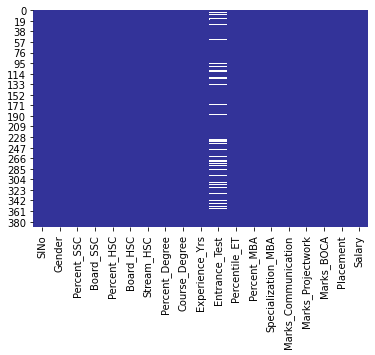

In [9]:
sns.heatmap(df.isnull(),cmap="terrain", cbar = False)

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           17% null values present only in 'entrance_test'.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

###### Null Values Imputation:

In [10]:
df['Entrance_Test'].dtype

dtype('O')

In [11]:
df['Entrance_Test'].value_counts()

MAT      265
K-MAT     24
CAT       22
PGCET      8
GCET       2
XAT        1
G-MAT      1
G-SAT      1
Name: Entrance_Test, dtype: int64

In [12]:
df['Specialization_MBA'].value_counts()

Marketing & Finance    222
Marketing & HR         156
Marketing & IB          13
Name: Specialization_MBA, dtype: int64

In [13]:
df['Entrance_Test'].fillna('MAT', inplace=True)

In [14]:
df.groupby('Entrance_Test')['Percentile_ET'].mean()

Entrance_Test
CAT      56.444091
G-MAT     0.000000
G-SAT     0.000000
GCET     45.000000
K-MAT    75.797083
MAT      54.580331
PGCET    16.750000
XAT      74.000000
Name: Percentile_ET, dtype: float64

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           since all students have MBA specialization, null is replaced with highest observation 'MAT'.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

###### Outlier Analysis:

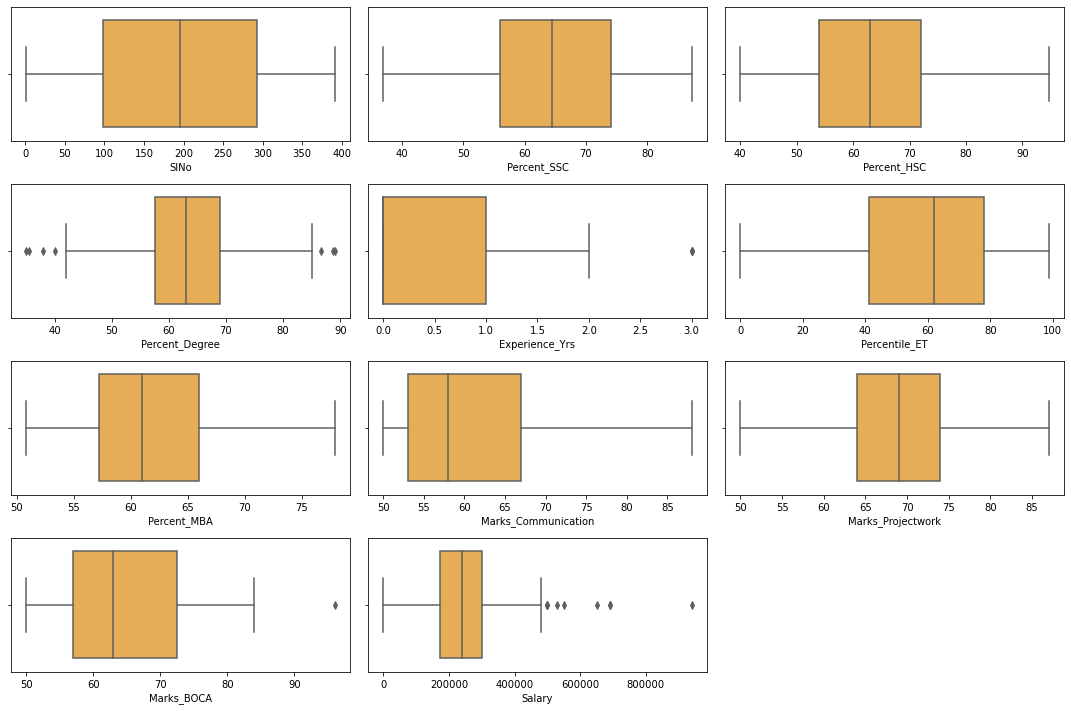

In [15]:
plt.figure(figsize=(15,12))
j = 1
for i in df_num.columns:
    plt.subplot(5,3,j)
    sns.boxplot(df_num[i], color = sns.color_palette('YlOrBr')[2])
    j+=1
    
plt.tight_layout()
plt.show()

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                          Few outliers are present in 'Percent_degree', 'Experience_Yrs' and 'Salary'.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

##### Skewness:

In [16]:
df.skew().sort_values(ascending=True)

Percentile_ET         -0.741718
Marks_Projectwork     -0.259735
Percent_SSC           -0.063271
SlNo                   0.000000
Percent_Degree         0.052679
Salary                 0.240575
Percent_HSC            0.291252
Marks_BOCA             0.293126
Percent_MBA            0.341080
Marks_Communication    0.741454
Experience_Yrs         1.277817
dtype: float64

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                          None of the numerical attributes are highly skewed.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

###### Distribution of Data:

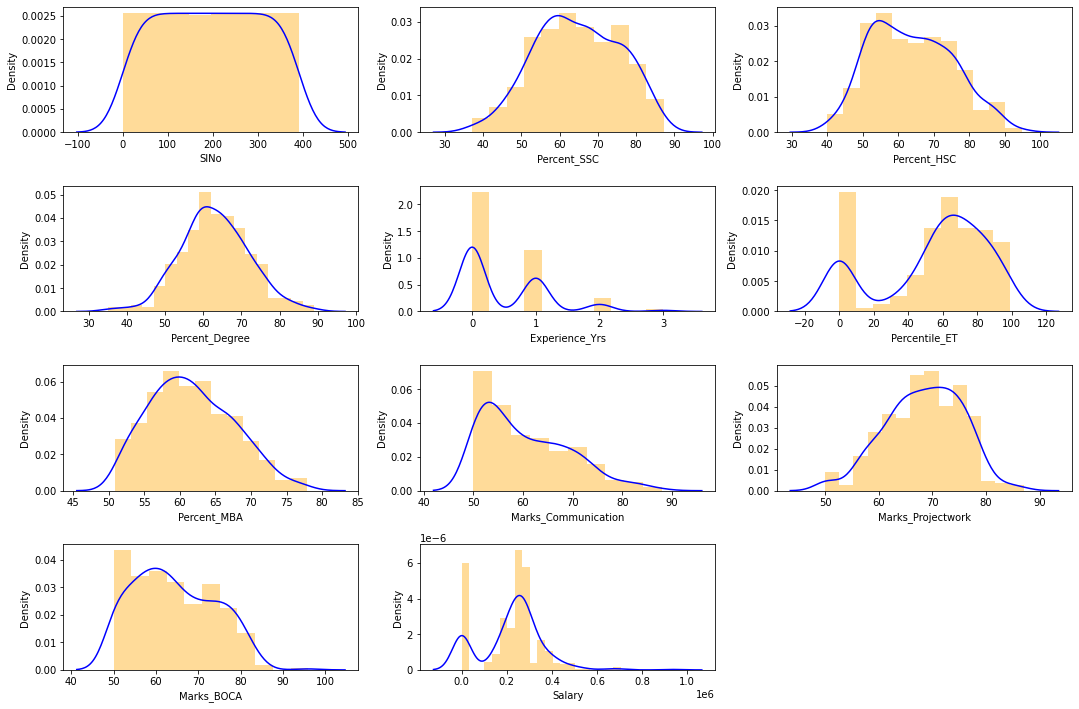

In [17]:
plt.figure(figsize=(15,12))
j = 1
for i in df_num.columns:
    plt.subplot(5,3,j)
    sns.distplot(df_num[i], color = 'orange', kde_kws = dict(color = 'blue'))
    j+=1
    
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import shapiro

In [19]:
for i in df_num.columns:
    stat, p = shapiro(df[i])
    alpha = 0.05
    if p > alpha:
        print(f'The data is normally distributed for:  {i}')

The data is normally distributed for:  Percent_Degree


<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Only 'Percent_Degree' column is normally distributed. Rest of the columns are not normally distibuted.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

###### Correlation:

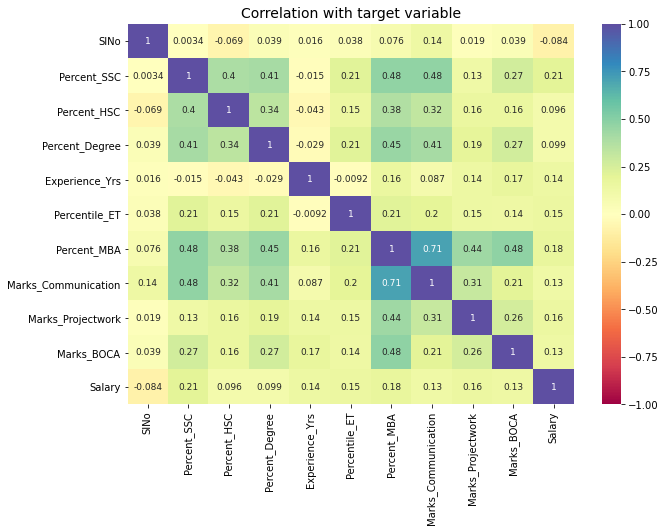

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, annot_kws={'size':9}, cmap = 'Spectral', vmin =-1, vmax =1);
plt.title('Correlation with target variable', size=14);

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Can observe positive correlation betwen Percent_MBA or Marks_Communication..</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

###### Pairplot:

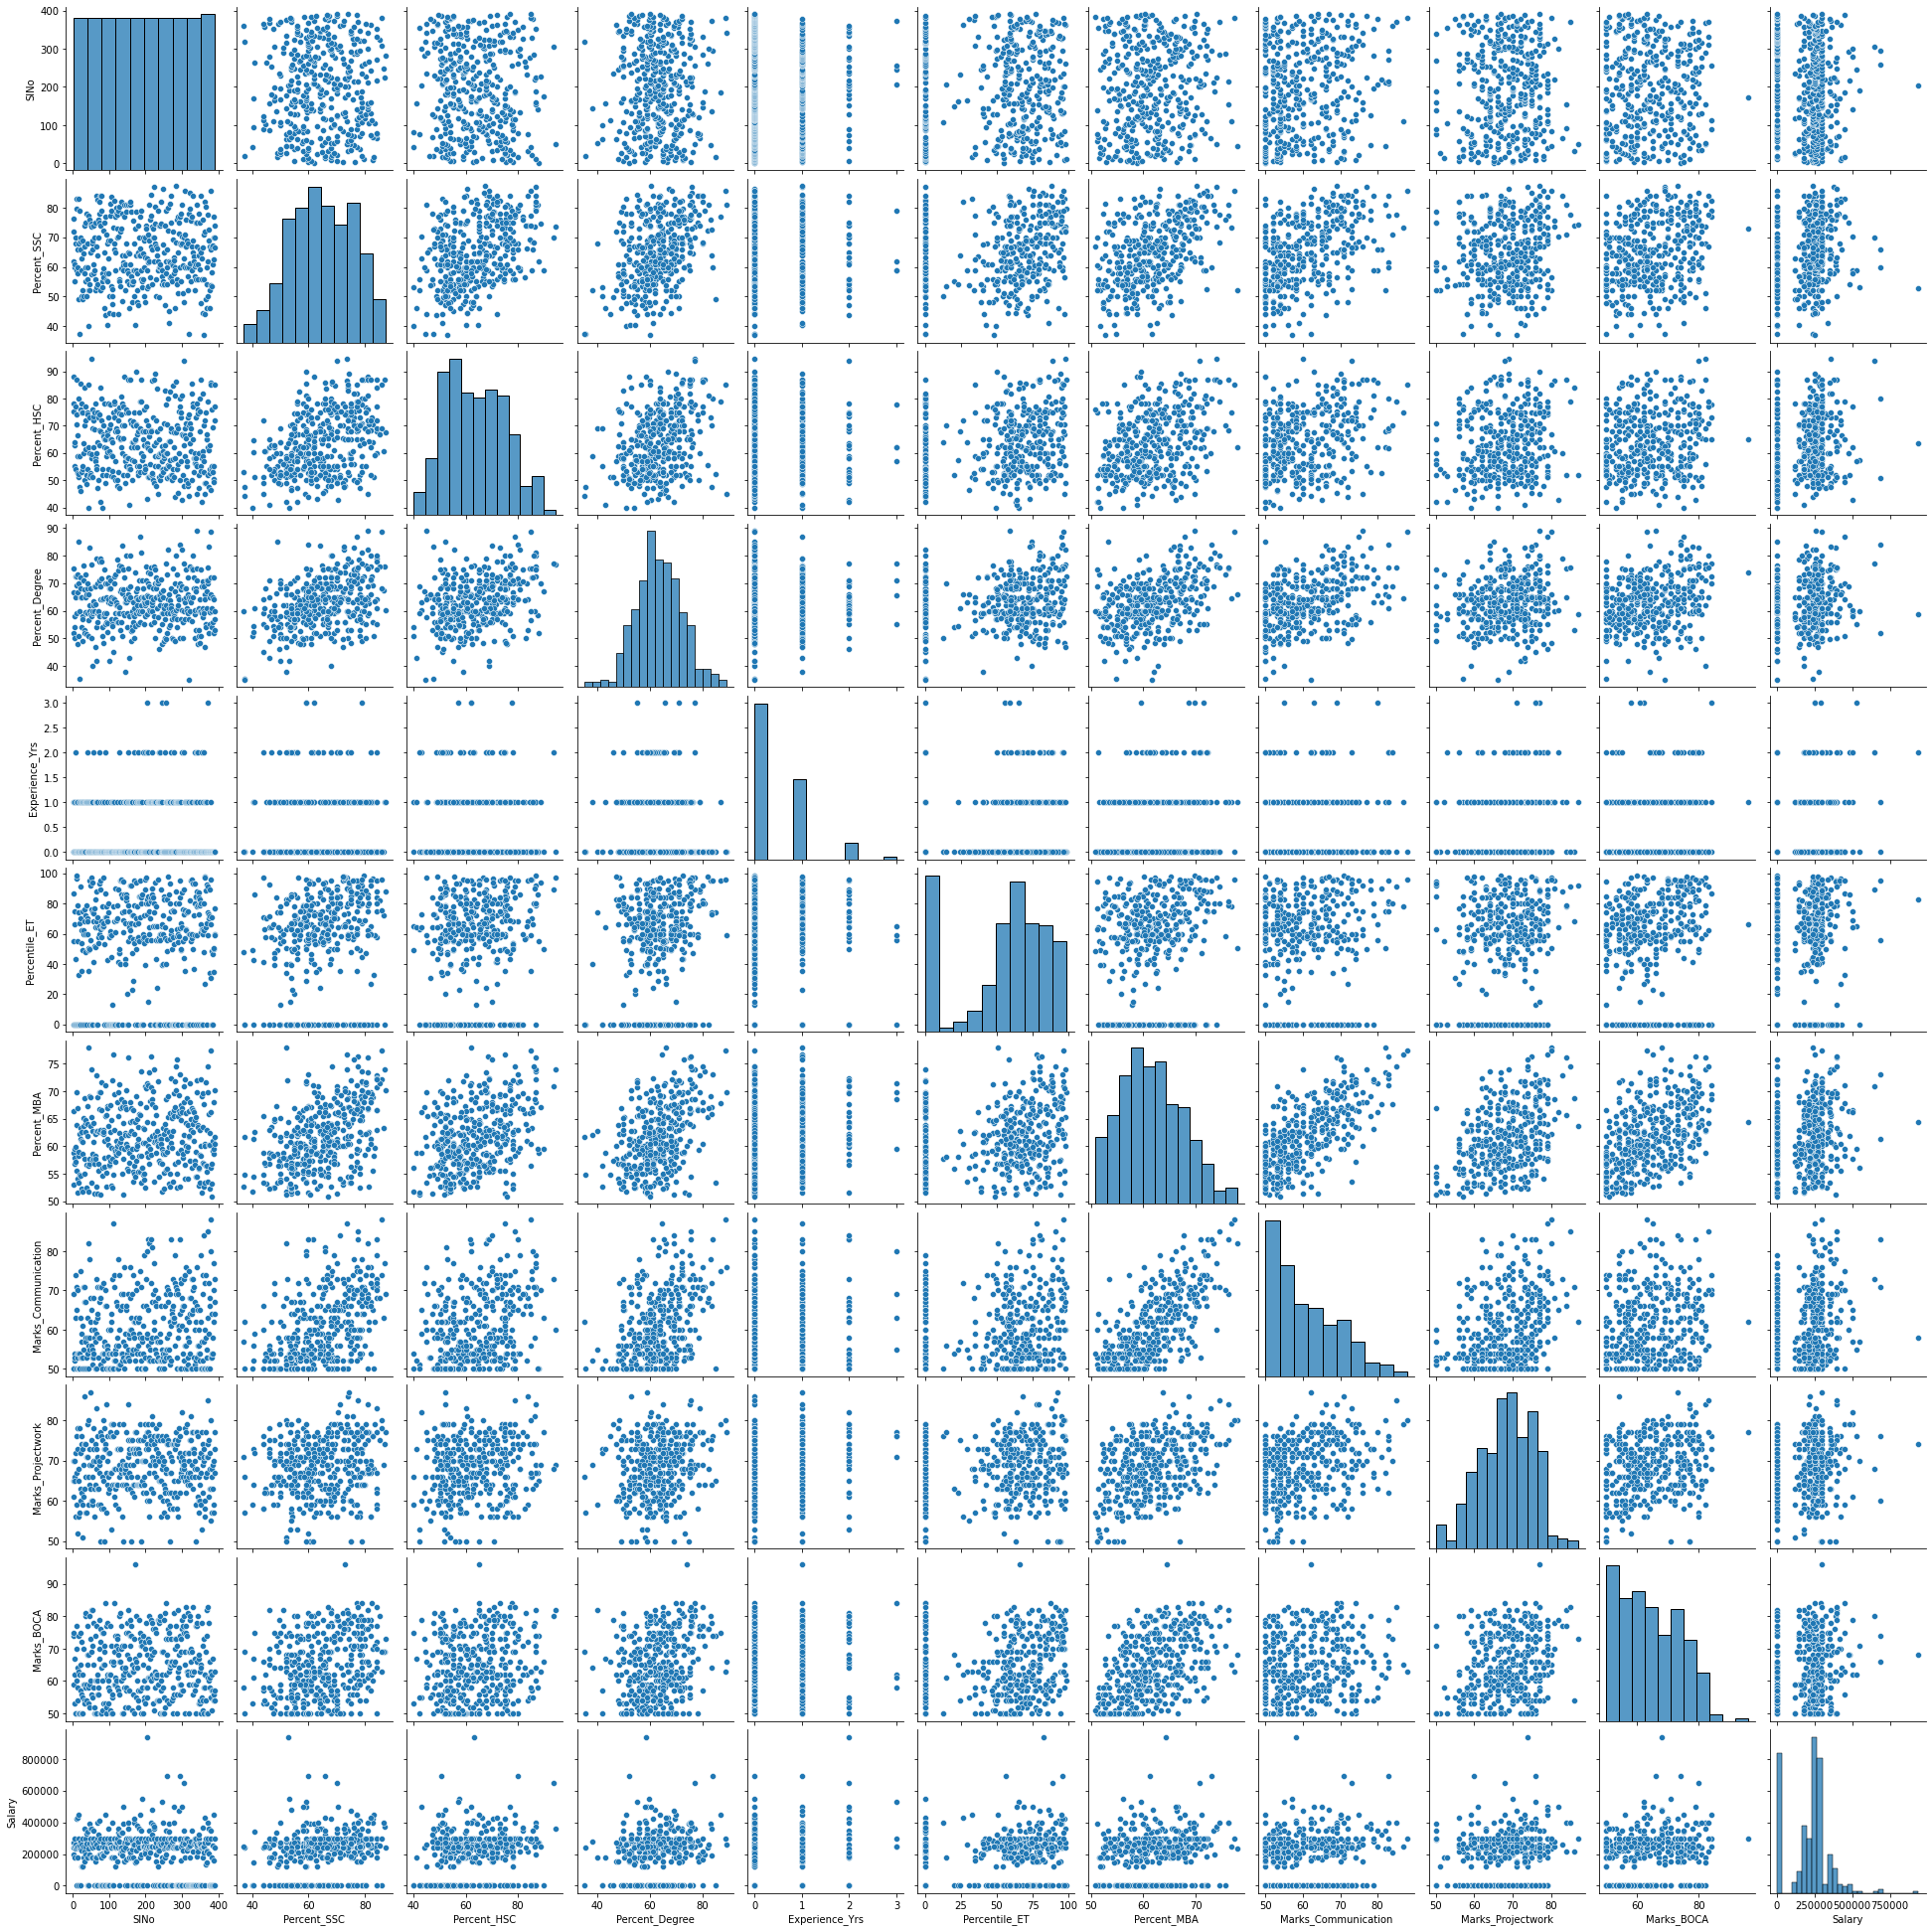

In [21]:
sns.pairplot(df)

##### Analysing numerical columns with target variable:

In [22]:
g = sns.color_palette('terrain',12)[1]

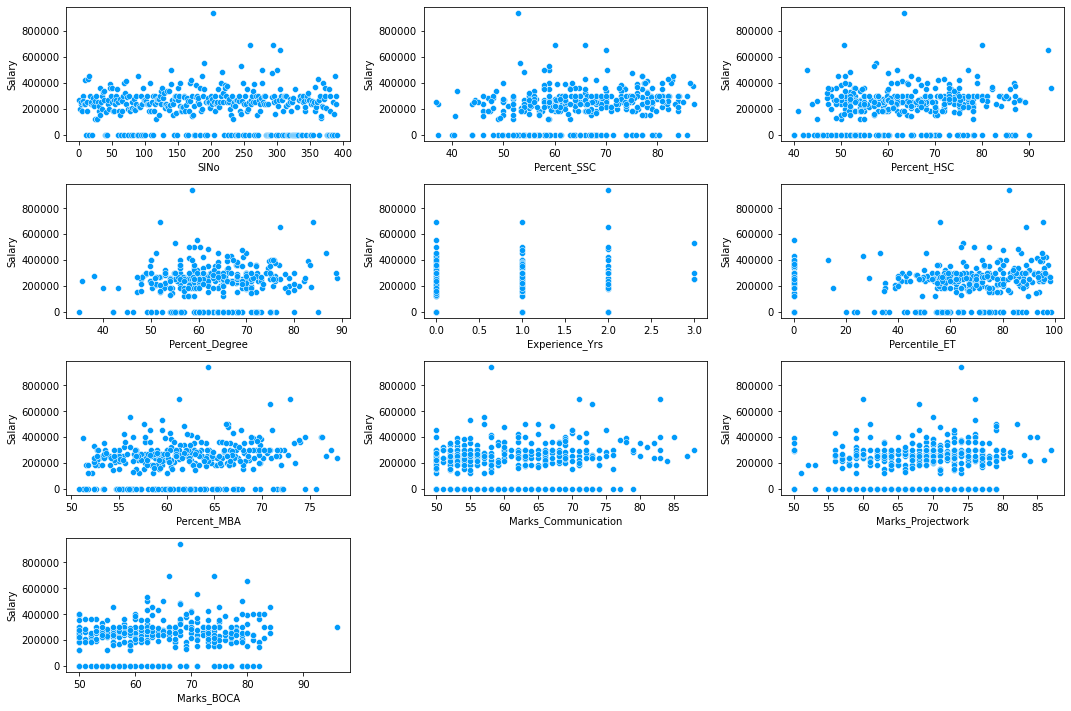

In [23]:
plt.figure(figsize=(15,12))
j = 1
for i in df_num.drop('Salary',axis=1).columns:
    plt.subplot(5,3,j)
    sns.scatterplot(df_num[i],df['Salary'], color = g)
    j+=1
    
plt.tight_layout()
plt.show()

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           No linear relationship between target and numerical independent variable can be identified.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

##### Analysing categorical variabel with target columns:

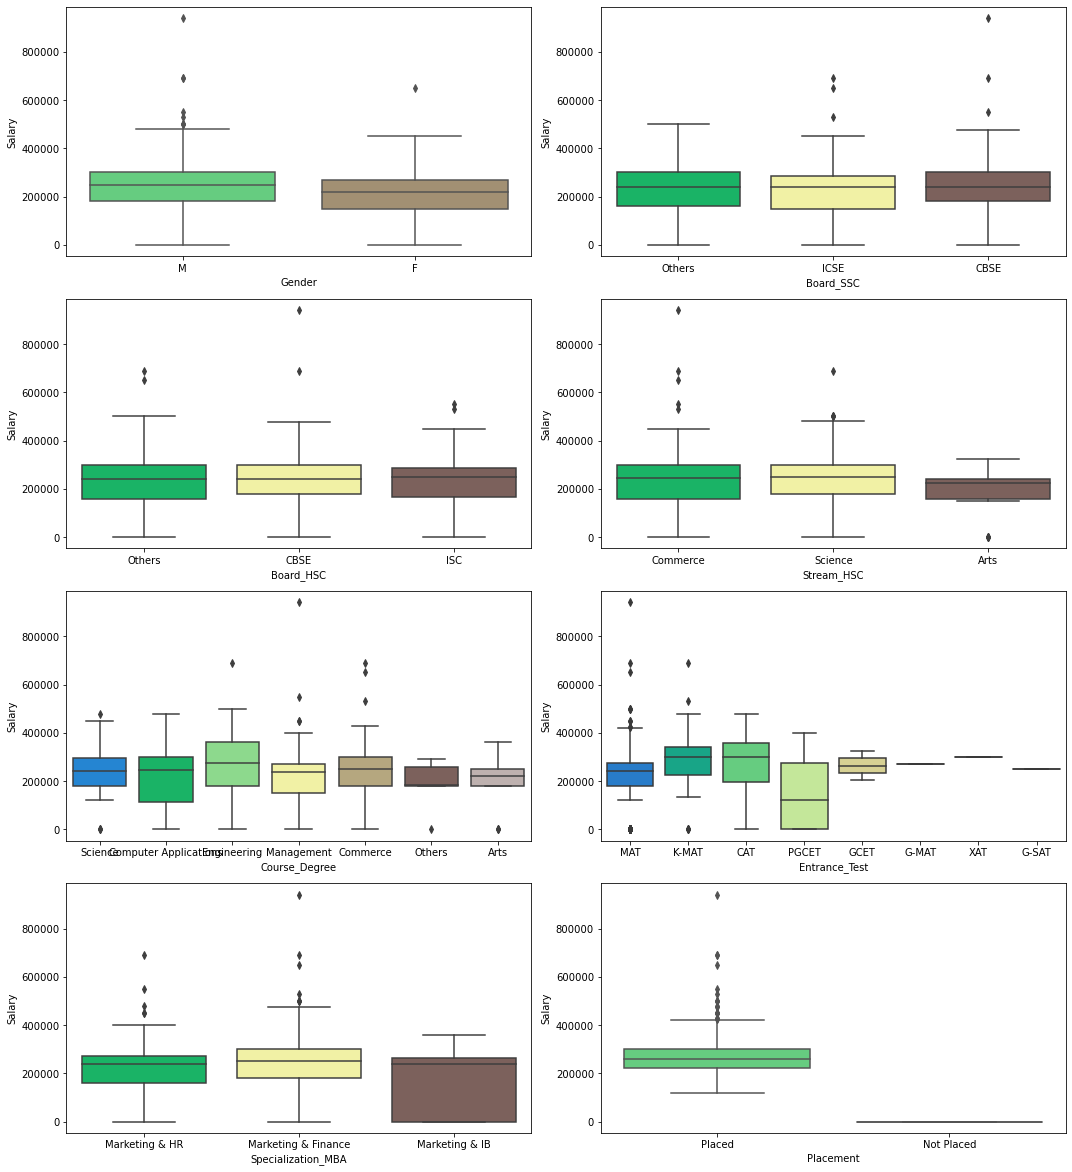

In [24]:
plt.figure(figsize=(15,20))
j = 1
for i in df_cat.columns:
    plt.subplot(5,2,j)
    sns.boxplot(df_cat[i],df['Salary'], palette= 'terrain')
    j+=1
    
plt.tight_layout()
plt.show()

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:<br>
                           1. In 'Entrance_Test'- GMAT, XAT and GSAT has very less records. They can be merged.<br>
                           2. In 'Placement' also Not Placed class very less observation.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

##### Analysing categorical variabel with 'Placement' columns:

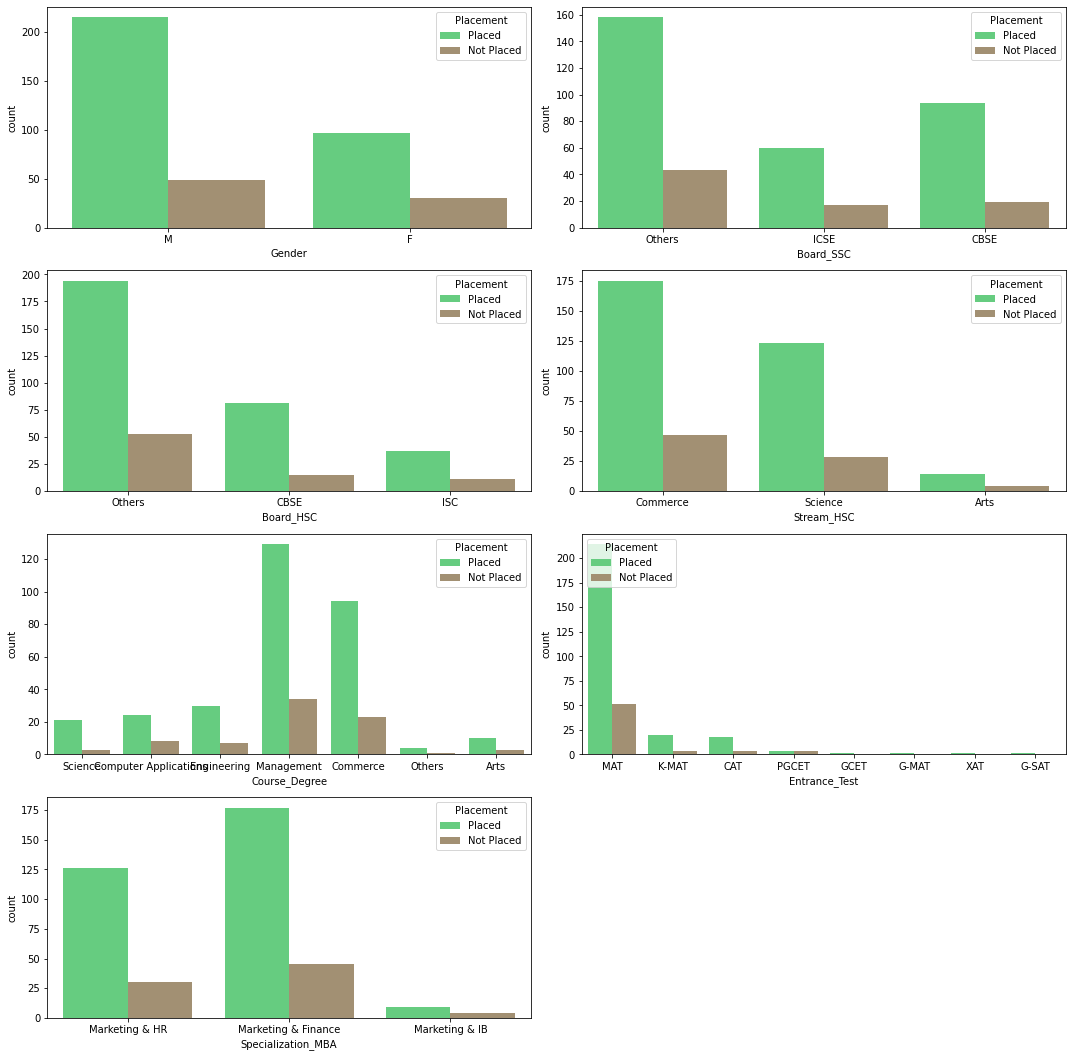

In [25]:
plt.figure(figsize=(15,18))
j = 1
for i in df_cat.drop('Placement', axis=1).columns:
    plt.subplot(5,2,j)
    sns.countplot(df_cat[i],hue = df['Placement'], palette= 'terrain')
    j += 1
    
plt.tight_layout()

###### Drop insignificant variables:

In [26]:
df.drop('SlNo', axis=1, inplace=True)

###### Feature Engineering:

In [27]:
# Reducing the categories in 'Entrance_Test' :
df['Entrance_Test']=df['Entrance_Test'].replace(['PGCET','GCET','XAT','G-SAT','G-MAT'],'Others')

In [28]:
df['Entrance_Test'].value_counts()

MAT       332
K-MAT      24
CAT        22
Others     13
Name: Entrance_Test, dtype: int64

##### Dummy Encoding of Categorical Variables:

In [29]:
feature = df.drop(['Salary'], axis=1)
target = df['Salary']

df_num = feature.select_dtypes(np.number)
df_cat = feature.select_dtypes(object)

encode = pd.get_dummies(df_cat, drop_first=True)
X = pd.concat([df_num,encode], axis=1)
y = target

In [30]:
print('number of continuous columns: ',len(df_num.columns))
print('number of categorical columns: ',len(df_cat.columns))

number of continuous columns:  9
number of categorical columns:  8


In [31]:
X.head(2)

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_Others,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,62.00,88.00,52.00,0,55.0,58.80,50,65,74,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1
1,76.33,75.33,75.48,1,86.5,66.28,69,70,75,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [32]:
X.shape

(391, 28)

### Splitting dataset into train and test:

In [33]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (273, 29)
y_train shape:  (273,)
X_test shape:  (118, 29)
y_test shape:  (118,)


In [34]:
from scipy import stats

#  Statistical test for X train and test: 
var = 0 
for i in  range(28):
    if stats.ttest_ind(X_train.iloc[:,i], X_test.iloc[:,i])[1] < 0.05:
        var = var + 1
        print('There is a strong variation in ', X_train.columns[i])
if var == 0:
    print('xtest & xtrain have similar type of data')

xtest & xtrain have similar type of data


In [35]:
#  Statistical test for y train and test:
if stats.ttest_ind(y_train, y_test)[1] > .05:
    print('ytest & ytrain contain similar type of data')

ytest & ytrain contain similar type of data


### Base model:

In [36]:
# assumption 1: Target is numeric
y.dtypes

dtype('int64')

In [37]:
# Base model:
base_model = sm.OLS(y_train,X_train).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     34.13
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           9.56e-69
Time:                        12:40:31   Log-Likelihood:                -3403.5
No. Observations:                 273   AIC:                             6865.
Df Residuals:                     244   BIC:                             6970.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -2.377e+05   6.81e+04     -3.490      0.001   -3.72e+05   -1.04e+05
Percent_SSC                           274.4696    501.716      0.547      0.585    -713.777    1262.716
Percent_HSC                           -31.7162    484.301     -0.065      0.948    -985.660     922.227
Percent_Degree                        946.4482    592.659      1.597      0.112    -220.933    2113.829
Experience_Yrs                       1.047e+04   6714.988      1.559      0.120   -2755.571    2.37e+04
Percentile_ET                          67.1396    139.014      0.483      0.630    -206.681     340.960
Percent_MBA                           664.6999   1250.595      0.532      0.596   -1798.639    3128.039
Marks_Communication                  1373.0200    712.655      1.927      0.055     -30.720    2776.760
Marks_Projectwork                     200.0581    680.900      0.294      0.769   -1141.134    1541.250
Marks_BOCA                            951.1237    534.520      1.779      0.076    -101.739    2003.986
Gender_M                             4.216e+04   9754.416      4.323      0.000     2.3e+04    6.14e+04
Board_SSC_ICSE                      -1.065e+04   1.72e+04     -0.620      0.536   -4.45e+04    2.32e+04
Board_SSC_Others                    -1.043e+04   1.41e+04     -0.738      0.461   -3.83e+04    1.74e+04
Board_HSC_ISC                        5782.8423   2.04e+04      0.284      0.777   -3.43e+04    4.59e+04
Board_HSC_Others                     1.994e+04   1.44e+04      1.381      0.169   -8510.644    4.84e+04
Stream_HSC_Commerce                  1.698e+04   2.42e+04      0.701      0.484   -3.07e+04    6.47e+04
Stream_HSC_Science                   3.132e+04   2.57e+04      1.216      0.225   -1.94e+04     8.2e+04
Course_Degree_Commerce              -1.982e+04   3.24e+04     -0.612      0.541   -8.36e+04    4.39e+04
Course_Degree_Computer Applications -5.204e+04   3.47e+04     -1.500      0.135    -1.2e+05    1.63e+04
Course_Degree_Engineering           -3.035e+04   3.38e+04     -0.898      0.370   -9.69e+04    3.62e+04
Course_Degree_Management            -5.351e+04    3.1e+04     -1.728      0.085   -1.15e+05    7483.278
Course_Degree_Others                -4.591e+04   5.06e+04     -0.908      0.365   -1.46e+05    5.37e+04
Course_Degree_Science               -4.814e+04   3.49e+04     -1.380      0.169   -1.17e+05    2.06e+04
Entrance_Test_K-MAT                  1.083e+04   2.34e+04      0.463      0.644   -3.52e+04    5.69e+04
Entrance_Test_MAT                   -5.293e+04   1.79e+04     -2.959      0.003   -8.82e+04   -1.77e+04
Entrance_Test_Others                -2.488e+04   2.83e+04     -0.879      0.380   -8.06e+04    3.09e+04
Specialization_MBA_Marketing & HR   -3.111e+04   9424.407     -3.30

In [38]:
base_model.rsquared

0.7966290690276094

In [39]:
base_model.rsquared_adj

0.7732914212111056

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           R-squared and adjusted R-squared are less with 79% & 77%. It can be improved by fine tuning the model.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# significant variables from base model:
coeff = base_model.pvalues
coeff[coeff<0.05].index

Index(['const', 'Gender_M', 'Entrance_Test_MAT',
       'Specialization_MBA_Marketing & HR', 'Placement_Placed'],
      dtype='object')

In [41]:
# insignificant variables from base model:
coeff[coeff>0.05].index

Index(['Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Experience_Yrs',
       'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Board_SSC_ICSE', 'Board_SSC_Others',
       'Board_HSC_ISC', 'Board_HSC_Others', 'Stream_HSC_Commerce',
       'Stream_HSC_Science', 'Course_Degree_Commerce',
       'Course_Degree_Computer Applications', 'Course_Degree_Engineering',
       'Course_Degree_Management', 'Course_Degree_Others',
       'Course_Degree_Science', 'Entrance_Test_K-MAT', 'Entrance_Test_Others',
       'Specialization_MBA_Marketing & IB'],
      dtype='object')

In [42]:
# multicollinearity:
base_model.condition_number

3675.012285283606

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Condition number above 1000 indicates severe Multicollinearity.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# assumption 2: Multicollinearity
df_num_vif = feature.select_dtypes(np.number)

for ind in range(len(df_num_vif.columns)):
    vif = pd.DataFrame()
    vif['Features'] = df_num_vif.columns
    vif['VIF_factor'] = [variance_inflation_factor(df_num_vif.values,i)   for i in range(len(df_num_vif.columns))]
    multi = vif[vif['VIF_factor'] >10]
    
    if (multi.empty == False):
        df_sorted = multi.sort_values(by ='VIF_factor', ascending=False)
    else:
        print(vif)
        break
        
    if (df_sorted.empty == False):
        df_num_vif = df_num_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

         Features  VIF_factor
0     Percent_HSC    4.521416
1  Experience_Yrs    1.477016
2   Percentile_ET    4.104046


<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Percent_HSC, Experience_Yrs & Percentile_ET variables have VIF less than 10.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# assumption 3: Check for normality of residuals
stats.jarque_bera(base_model.resid)

Jarque_beraResult(statistic=133.4682404359048, pvalue=0.0)

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Residuals are not normally distributed.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 864x504 with 0 Axes>

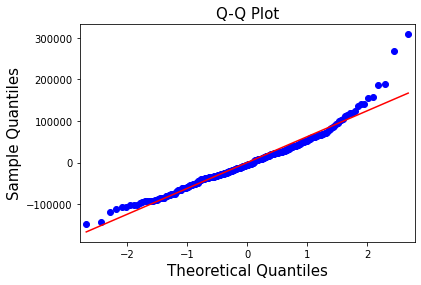

In [45]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(12,7));
qqplot(base_model.resid, line = 'r');
plt.title('Q-Q Plot', fontsize = 15);
plt.xlabel('Theoretical Quantiles', fontsize = 15);
plt.ylabel('Sample Quantiles', fontsize = 15);

In [46]:
# assumption 4: heteroscedasticity
from statsmodels.compat import lzip

name = ['f-value','p-value']

test = sms.het_breuschpagan(base_model.resid, base_model.model.exog)

lzip(name, test[2:])

[('f-value', 1.6886880954603165), ('p-value', 0.01978146245800226)]

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Heteroskedasticity present in the data.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# assumption 5: absence of autocorrelation
# Durbin-Watson: 1.941

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Closer to 2. So no autocorrelation.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
X_train.head(1)

,const,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_Others,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
274,1.0,60.6,54.0,59.5,0,57.63,62.72,63,58,58,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1


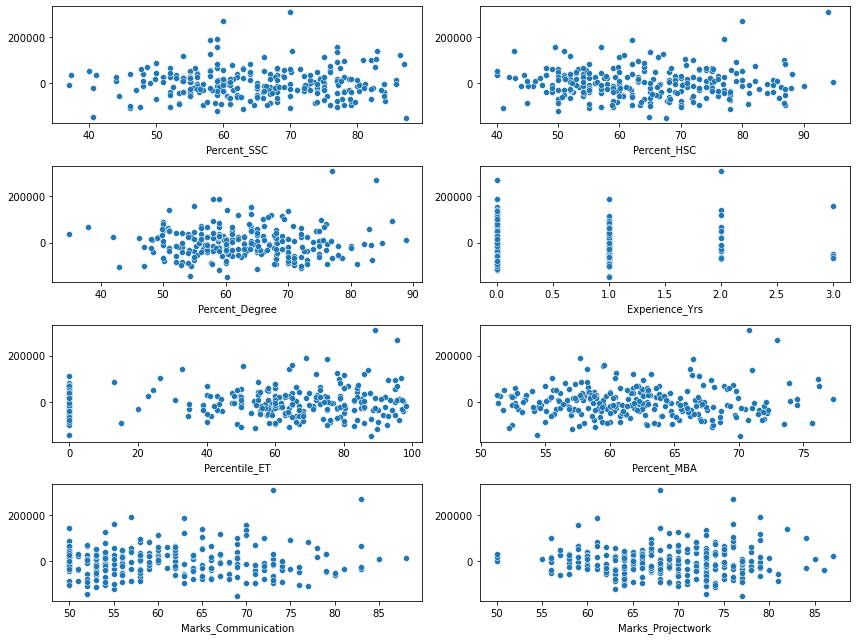

In [49]:
# assumption 6: Linear Relationship between Dependent and Independent Variable
plt.figure(figsize=(12,9))
j = 1
for i in X_train.columns[1:9]:
    plt.subplot(4,2,j)
    sns.scatterplot(X_train[i],base_model.resid)
    j+=1
    
plt.tight_layout()
plt.show()

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           No distinct pattern is visible. So there is linearity present.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

#### Model Evaluation: 

In [50]:
ytrain_pred_base = base_model.predict(X_train)

ytrain_rmse_base = rmse(y_train,ytrain_pred_base)
print('train_rmse_base: ',ytrain_rmse_base)

train_rmse_base:  62834.296469124325


In [51]:
ytest_pred_base = base_model.predict(X_test)

ytest_rmse_base = rmse(y_test,ytest_pred_base)
print('test_rmse_base: ',ytest_rmse_base)

test_rmse_base:  102976.75460411521


<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Train rmse is lesser than test rmse. There is overfitting</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

### Model Fine Tuning:

#### Model using VIF:

In [52]:
df_num_vif.columns

Index(['Percent_HSC', 'Experience_Yrs', 'Percentile_ET'], dtype='object')

In [53]:
X0 = pd.concat([df_num_vif,encode], axis=1)
y0 = target

In [54]:
X0 = sm.add_constant(X0)
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y0, test_size=0.3, random_state=10)

print('X_train shape: ', X0_train.shape)
print('y_train shape: ', y0_train.shape)
print('X_test shape: ', X0_test.shape)
print('y_test shape: ', y0_test.shape)

X_train shape:  (273, 23)
y_train shape:  (273,)
X_test shape:  (118, 23)
y_test shape:  (118,)


In [55]:
vif_model = sm.OLS(y0_train,X0_train).fit()
vif_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     38.94
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           5.39e-68
Time:                        12:40:33   Log-Likelihood:                -3417.9
No. Observations:                 273   AIC:                             6882.
Df Residuals:                     250   BIC:                             6965.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -5.463e+04   4.51e+04     -1.211      0.227   -1.43e+05    3.42e+04
Percent_HSC                           993.9283    419.106      2.372      0.018     168.499    1819.357
Experience_Yrs                       1.678e+04   6671.619      2.515      0.013    3638.960    2.99e+04
Percentile_ET                         202.1676    141.766      1.426      0.155     -77.040     481.375
Gender_M                             2.448e+04   9355.616      2.617      0.009    6053.164    4.29e+04
Board_SSC_ICSE                      -8832.8798   1.76e+04     -0.501      0.617   -4.36e+04    2.59e+04
Board_SSC_Others                    -1.024e+04   1.43e+04     -0.716      0.475   -3.84e+04    1.79e+04
Board_HSC_ISC                        3554.4428   2.11e+04      0.168      0.866    -3.8e+04    4.51e+04
Board_HSC_Others                     1.923e+04   1.48e+04      1.301      0.195   -9884.597    4.83e+04
Stream_HSC_Commerce                  2.594e+04   2.48e+04      1.046      0.296   -2.29e+04    7.48e+04
Stream_HSC_Science                   5.308e+04   2.56e+04      2.076      0.039    2711.499    1.03e+05
Course_Degree_Commerce              -1473.7717   3.34e+04     -0.044      0.965   -6.72e+04    6.42e+04
Course_Degree_Computer Applications -1.765e+04   3.51e+04     -0.503      0.615   -8.67e+04    5.14e+04
Course_Degree_Engineering            -1.06e+04   3.49e+04     -0.303      0.762   -7.94e+04    5.82e+04
Course_Degree_Management            -3.632e+04   3.18e+04     -1.142      0.255    -9.9e+04    2.63e+04
Course_Degree_Others                -3.286e+04   5.16e+04     -0.637      0.525   -1.34e+05    6.87e+04
Course_Degree_Science               -3.239e+04    3.6e+04     -0.899      0.369   -1.03e+05    3.86e+04
Entrance_Test_K-MAT                  7481.7370   2.39e+04      0.313      0.755   -3.96e+04    5.46e+04
Entrance_Test_MAT                   -5.565e+04   1.84e+04     -3.021      0.003   -9.19e+04   -1.94e+04
Entrance_Test_Others                -2.676e+04   2.93e+04     -0.913      0.362   -8.45e+04     3.1e+04
Specialization_MBA_Marketing & HR    -3.17e+04   9596.058     -3.303      0.001   -5.06e+04   -1.28e+04
Specialization_MBA_Marketing & IB   -3.102e+04   2.26e+04     -1.372      0.171   -7.56e+04    1.35e+04
Placement_Placed                     2.737e+05   1.04e+04     26.333      0.000    2.53e+05    2.94e+05
==============================================================================
Omnibus:                       66.550   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.571
Skew:                           1.093   Prob(JB):                     3.74e-40
Kurtosis:                       6.344   Cond. No.              

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           r_sq has reduced from 79% to 77%.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

#### Model Evaluation: 

In [56]:
ytrain_pred_vif = vif_model.predict(X0_train)

ytrain_rmse_vif = rmse(y0_train,ytrain_pred_vif)
print('train_rmse_rfe: ',ytrain_rmse_vif)

train_rmse_rfe:  66222.24965017854


In [57]:
ytest_pred_vif = vif_model.predict(X0_test)

ytest_rmse_vif = rmse(y0_test,ytest_pred_vif)
print('test_rmse_re: ',ytest_rmse_vif)

test_rmse_re:  101673.01296697979


In [58]:
# significant
coeff0 = vif_model.pvalues
coeff0[coeff0<0.05].index

Index(['Percent_HSC', 'Experience_Yrs', 'Gender_M', 'Stream_HSC_Science',
       'Entrance_Test_MAT', 'Specialization_MBA_Marketing & HR',
       'Placement_Placed'],
      dtype='object')

In [59]:
# insignificant
coeff0.index[coeff0>0.05]

Index(['const', 'Percentile_ET', 'Board_SSC_ICSE', 'Board_SSC_Others',
       'Board_HSC_ISC', 'Board_HSC_Others', 'Stream_HSC_Commerce',
       'Course_Degree_Commerce', 'Course_Degree_Computer Applications',
       'Course_Degree_Engineering', 'Course_Degree_Management',
       'Course_Degree_Others', 'Course_Degree_Science', 'Entrance_Test_K-MAT',
       'Entrance_Test_Others', 'Specialization_MBA_Marketing & IB'],
      dtype='object')

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:<br>
                          1. All boards and course are insignificant.<br>
                          2. 1 in 2 specialization is insignificant.<br>
                          3. 2 in 3 Entrance tests are insignificant.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

#### Model using significant variables in vif model:

In [60]:
df.columns

Index(['Gender', 'Percent_SSC', 'Board_SSC', 'Percent_HSC', 'Board_HSC',
       'Stream_HSC', 'Percent_Degree', 'Course_Degree', 'Experience_Yrs',
       'Entrance_Test', 'Percentile_ET', 'Percent_MBA', 'Specialization_MBA',
       'Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA', 'Placement',
       'Salary'],
      dtype='object')

In [61]:
feature1 = df.drop(['Board_SSC','Board_HSC','Stream_HSC','Course_Degree','Salary'], axis=1)
target1 = df['Salary']

In [62]:
df_num = feature1.select_dtypes(np.number)
df_cat = feature1.select_dtypes(object)

encode = pd.get_dummies(df_cat, drop_first=True)

X1 = pd.concat([df_num,encode], axis=1)
y1 = target1

In [63]:
X1.head(2)

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_Others,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,62.00,88.00,52.00,0,55.0,58.80,50,65,74,1,0,1,0,1,0,1
1,76.33,75.33,75.48,1,86.5,66.28,69,70,75,1,0,1,0,0,0,1


In [64]:
X1 = sm.add_constant(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=10)

print('X_train shape: ', X1_train.shape)
print('y_train shape: ', y1_train.shape)
print('X_test shape: ', X1_test.shape)
print('y_test shape: ', y1_test.shape)

X_train shape:  (273, 17)
y_train shape:  (273,)
X_test shape:  (118, 17)
y_test shape:  (118,)


In [65]:
signi_var_model = sm.OLS(y1_train,X1_train).fit()
signi_var_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     57.19
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           7.54e-75
Time:                        12:40:33   Log-Likelihood:                -3413.4
No. Observations:                 273   AIC:                             6861.
Df Residuals:                     256   BIC:                             6922.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.685e+05   6.42e+04     -4.183      0.000   -3.95e+05   -1.42e+05
Percent_SSC                         479.6739    461.614      1.039      0.300    -429.370    1388.718
Percent_HSC                         -61.4883    417.419     -0.147      0.883    -883.500     760.524
Percent_Degree                      596.0717    563.635      1.058      0.291    -513.879    1706.023
Experience_Yrs                     1.154e+04   6561.718      1.759      0.080   -1377.176    2.45e+04
Percentile_ET                        59.2455    140.091      0.423      0.673    -216.632     335.123
Percent_MBA                         613.9049   1246.946      0.492      0.623   -1841.673    3069.483
Marks_Communication                1440.6637    704.381      2.045      0.042      53.545    2827.782
Marks_Projectwork                   441.5411    672.491      0.657      0.512    -882.777    1765.859
Marks_BOCA                         1179.5892    528.458      2.232      0.026     138.910    2220.268
Gender_M                            4.71e+04   9424.675      4.998      0.000    2.85e+04    6.57e+04
Entrance_Test_K-MAT                5671.8621   2.32e+04      0.244      0.807   -4.01e+04    5.14e+04
Entrance_Test_MAT                 -5.663e+04   1.77e+04     -3.192      0.002   -9.16e+04   -2.17e+04
Entrance_Test_Others               -4.23e+04    2.8e+04     -1.511      0.132   -9.75e+04    1.28e+04
Specialization_MBA_Marketing & HR -3.021e+04   8999.615     -3.357      0.001   -4.79e+04   -1.25e+04
Specialization_MBA_Marketing & IB -2.742e+04   2.19e+04     -1.252      0.212   -7.06e+04    1.57e+04
Placement_Placed                   2.702e+05   1.03e+04     26.187      0.000     2.5e+05    2.91e+05
==============================================================================
Omnibus:                       70.679   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.321
Skew:                           1.131   Prob(JB):                     5.80e-46
Kurtosis:                       6.632   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:<br>
                          There is no imporvement in R squared.<br>     
                </font>
            </div>
        </td>
    </tr>
</table>

#### Model Evaluation: 

In [66]:
ytrain_pred_sig = signi_var_model.predict(X1_train)

ytrain_rmse_sig = rmse(y1_train,ytrain_pred_sig)
print('train_rmse_rfe: ',ytrain_rmse_sig)

train_rmse_rfe:  65146.87862106973


In [67]:
ytest_pred_sig = signi_var_model.predict(X1_test)

ytest_rmse_sig = rmse(y1_test,ytest_pred_sig)
print('test_rmse_re: ',ytest_rmse_sig)

test_rmse_re:  99987.97548911236


#### Feature Selection:

In [68]:
feature2 = df.drop(['Salary'], axis=1)
target2 = df['Salary']

df_num = feature2.select_dtypes(np.number)
df_cat = feature2.select_dtypes(object)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_num = pd.DataFrame(ss.fit_transform(df_num), columns = df_num.columns)

encode = pd.get_dummies(df_cat, drop_first=True)

X2 = pd.concat([scaled_num,encode], axis=1)
y2 = target2
#y2 = (target2 - target2.mean()) / target2.std()

X2 = sm.add_constant(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3, random_state=10)

print('X_train shape: ', X2_train.shape)
print('y_train shape: ', y2_train.shape)
print('X_test shape: ', X2_test.shape)
print('y_test shape: ', y2_test.shape)

X_train shape:  (273, 29)
y_train shape:  (273,)
X_test shape:  (118, 29)
y_test shape:  (118,)


In [69]:
X2.head(2)

,const,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_Others,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,1.0,-0.242304,2.12264,-1.233456,-0.717830,0.002089,-0.490464,-1.195948,-0.471300,1.005320,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1
1,1.0,1.066802,1.01154,1.403341,0.783088,1.014028,0.788845,0.960009,0.229378,1.109806,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [70]:
# RFE:
lr = LinearRegression()
rfe = RFE(estimator=lr) 
rfe = rfe.fit(X2_train,y2_train)

In [71]:
rank = pd.DataFrame(data = rfe.ranking_, index=X2_train.columns, columns=['Features'])
rank

,Features
const,16
Percent_SSC,12
Percent_HSC,15
Percent_Degree,6
Experience_Yrs,7
Percentile_ET,13
Percent_MBA,11
Marks_Communication,1
Marks_Projectwork,14
Marks_BOCA,3


In [72]:
col = rank.index[rank['Features']==1]

In [73]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X2[col],y2, test_size=0.3, random_state=10)

print('X_train shape: ', X3_train.shape)
print('y_train shape: ', y3_train.shape)
print('X_test shape: ', X3_test.shape)
print('y_test shape: ', y3_test.shape)

X_train shape:  (273, 14)
y_train shape:  (273,)
X_test shape:  (118, 14)
y_test shape:  (118,)


In [74]:
rfe_model = sm.OLS(y3_train,X3_train).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              267.6
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                   4.96e-145
Time:                        12:40:33   Log-Likelihood:                         -3416.3
No. Observations:                 273   AIC:                                      6861.
Df Residuals:                     259   BIC:                                      6911.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Marks_Communication                   2.11e+04   4276.548      4.934      0.000    1.27e+04    2.95e+04
Gender_M                             3.415e+04   9183.522      3.718      0.000    1.61e+04    5.22e+04
Stream_HSC_Commerce                  3.934e+04   1.36e+04      2.891      0.004    1.25e+04    6.61e+04
Stream_HSC_Science                   5.516e+04   1.68e+04      3.284      0.001    2.21e+04    8.82e+04
Course_Degree_Computer Applications -1.897e+04   1.89e+04     -1.003      0.317   -5.62e+04    1.83e+04
Course_Degree_Engineering           -2310.9257   1.82e+04     -0.127      0.899   -3.81e+04    3.35e+04
Course_Degree_Management            -3.419e+04      1e+04     -3.418      0.001   -5.39e+04   -1.45e+04
Course_Degree_Others                -2.372e+04   4.04e+04     -0.587      0.558   -1.03e+05    5.59e+04
Course_Degree_Science               -2.343e+04   2.03e+04     -1.156      0.249   -6.34e+04    1.65e+04
Entrance_Test_MAT                   -4.925e+04    1.1e+04     -4.466      0.000    -7.1e+04   -2.75e+04
Entrance_Test_Others                -1.665e+04    2.4e+04     -0.694      0.488   -6.39e+04    3.06e+04
Specialization_MBA_Marketing & HR    -2.85e+04   9166.730     -3.109      0.002   -4.65e+04   -1.04e+04
Specialization_MBA_Marketing & IB   -3.629e+04   2.18e+04     -1.663      0.097   -7.92e+04    6675.200
Placement_Placed                      2.84e+05   9484.166     29.942      0.000    2.65e+05    3.03e+05
==============================================================================
Omnibus:                       72.983   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.304
Skew:                           1.150   Prob(JB):                     7.22e-50
Kurtosis:                       6.822   Cond. No.                         16.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:<br>
                          1. rsquared has increased from 79% in base model to 93.5% after feature selection of 14 variables using RFE.<br>
                          2. adj rsquared is 93.2%.<br>
                          3. no autocorrelation as durbin watson is close to 2.<br>
                          4. the residuals are not normally distributed as jarque bera pval is less than 0.05.<br>
                          5. no multicollinearity as condition number is 17 which is less than 100.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 864x504 with 0 Axes>

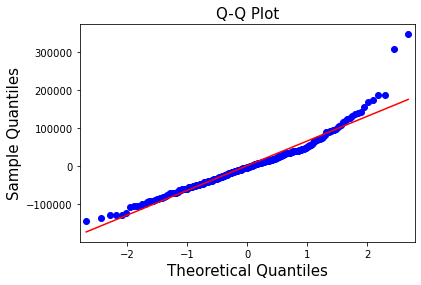

In [75]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(12,7));
qqplot(rfe_model.resid, line = 'r');
plt.title('Q-Q Plot', fontsize = 15);
plt.xlabel('Theoretical Quantiles', fontsize = 15);
plt.ylabel('Sample Quantiles', fontsize = 15);

In [76]:
# assumption 4: heteroscedasticity
from statsmodels.compat import lzip

name = ['f-value','p-value']

test = sms.het_breuschpagan(rfe_model.resid, base_model.model.exog)

lzip(name, test[2:])

[('f-value', 1.4808034481441323), ('p-value', 0.06232443776553907)]

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Heteroskedasticity present in the data.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

#### Model Evaluation: 

In [77]:
ytrain_pred_rfe = rfe_model.predict(X3_train)

ytrain_rmse_rfe = rmse(y3_train,ytrain_pred_rfe)
print('train_rmse_rfe: ',ytrain_rmse_rfe)

train_rmse_rfe:  65851.50823521269


In [78]:
ytest_pred_rfe = rfe_model.predict(X3_test)

ytest_rmse_rfe = rmse(y3_test,ytest_pred_rfe)
print('test_rmse_re: ',ytest_rmse_rfe)

test_rmse_re:  100292.24261127392


<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Train rmse is lesser than test rmse. There is overfitting</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

##### Ridge Regularization:

In [85]:
ridge = Ridge(alpha = 5, max_iter=500)
ridge_model = ridge.fit(X3_train, y3_train)

In [86]:
ytrain_pred_ridge = ridge_model.predict(X3_train)

ytrain_rmse_ridge = rmse(y3_train,ytrain_pred_ridge)
print('train_rmse_ridge: ',ytrain_rmse_ridge)

train_rmse_ridge:  66686.04878385742


In [87]:
ytest_pred_ridge = ridge_model.predict(X3_test)

ytest_rmse_ridge = rmse(y3_test,ytest_pred_ridge)
print('test_rmse_ridge: ',ytest_rmse_ridge)

test_rmse_ridge:  98710.37176907793


##### Lasso Regularization:

In [98]:
lasso = Lasso(alpha = 0.03, max_iter=500)
lasso_model = lasso.fit(X3_train, y3_train)

In [99]:
ytrain_pred_lasso = lasso_model.predict(X3_train)

ytrain_rmse_lasso = rmse(y3_train,ytrain_pred_lasso)
print('train_rmse_lasso: ',ytrain_rmse_lasso)

train_rmse_lasso:  65469.39849338464


In [100]:
ytest_pred_lasso = lasso_model.predict(X3_test)

ytest_rmse_lasso = rmse(y3_test,ytest_pred_lasso)
print('test_rmse_lasso: ',ytest_rmse_lasso)

test_rmse_lasso:  101036.6548325178


##### Elasticnet Regularization:

In [102]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)
enet_model = enet.fit(X3_train, y3_train)

In [103]:
ytrain_pred_enet = enet_model.predict(X3_train)

ytrain_rmse_enet = rmse(y3_train,ytrain_pred_enet)
print('train_rmse_enet: ',ytrain_rmse_enet)

train_rmse_enet:  79347.5703850781


In [104]:
ytest_pred_enet = enet_model.predict(X3_test)

ytest_rmse_enet = rmse(y3_test,ytest_pred_enet)
print('test_rmse_enet: ',ytest_rmse_enet)

test_rmse_enet:  100338.7847515211


In [105]:
ytest_rmse_enet - ytrain_rmse_enet

20991.214366443004

#### GridsearchCV:

In [106]:
tune=[{'alpha': [0.1,0.5,1,1.5,2],
      'l1_ratio':[0.01,0.05,0.5,0.6]}]

e=ElasticNet(max_iter=500)

e_grid=GridSearchCV(estimator=e,
            param_grid=tune,
            cv=5)
e_grid.fit(X3_train,y3_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=500),
             param_grid=[{'alpha': [0.1, 0.5, 1, 1.5, 2],
                          'l1_ratio': [0.01, 0.05, 0.5, 0.6]}])

In [107]:
e_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.6}

In [108]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.6, max_iter=500)
enet_model = enet.fit(X3_train, y3_train)

In [113]:
enet_model.score(X3_train,y3_train)

0.749905029737203

In [109]:
ytrain_pred_enet = enet_model.predict(X3_train)

ytrain_rmse_enet = rmse(y3_train,ytrain_pred_enet)
print('train_rmse_enet: ',ytrain_rmse_enet)

train_rmse_enet:  69679.46335833264


In [110]:
ytest_pred_enet = enet_model.predict(X3_test)

ytest_rmse_enet = rmse(y3_test,ytest_pred_enet)
print('test_rmse_enet: ',ytest_rmse_enet)

test_rmse_enet:  98123.50672738471


In [111]:
ytest_rmse_enet - ytrain_rmse_enet

28444.043369052073

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Overfitting has reduced considerably</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

##### Feature Importance:

<AxesSubplot:xlabel='Coefficient', ylabel='Variable'>

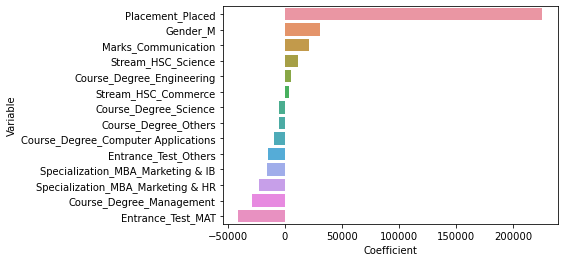

In [115]:
enet_coeff = pd.DataFrame({'Variable': X3_train.columns, 'Coefficient': enet_model.coef_})
enet_coeff = enet_coeff.sort_values('Coefficient', ascending = False)
sns.barplot(x = "Coefficient", y = "Variable", data = enet_coeff)

In [116]:
ridge_model.rsquared = ridge_model.score(X3_train, y3_train)
n = X3_train.shape[0]
k = X3_train.shape[1]
ridge_model.rsquared_adj = 1 - ((1-ridge_model.rsquared)*(n-1)/(n-k-1))

In [117]:
lasso_model.rsquared = lasso_model.score(X3_train, y3_train)
n = X3_train.shape[0]
k = X3_train.shape[1]
lasso_model.rsquared_adj = 1 - ((1-lasso_model.rsquared)*(n-1)/(n-k-1))

In [118]:
enet_model.rsquared = enet_model.score(X3_train, y3_train)
n = X3_train.shape[0]
k = X3_train.shape[1]
enet_model.rsquared_adj = 1 - ((1-enet_model.rsquared)*(n-1)/(n-k-1))

In [119]:
result = pd.DataFrame({'model name':['base_mode','vif_model','significant var model', 'rfe_model','ridge','lasso',
                                     'elastinet reg'],
                       
                       'R_square' : [base_model.rsquared, vif_model.rsquared, signi_var_model.rsquared,
                                     rfe_model.rsquared, ridge_model.rsquared, lasso_model.rsquared, enet_model.rsquared],
                       
                      'R_square_adj' : [base_model.rsquared_adj, vif_model.rsquared_adj, signi_var_model.rsquared_adj,
                                        rfe_model.rsquared_adj, ridge_model.rsquared_adj, lasso_model.rsquared_adj,
                                        enet_model.rsquared_adj],
                       
                      'train_rmse': [ytrain_rmse_base, ytrain_rmse_vif, ytrain_rmse_sig,
                                     ytrain_rmse_rfe, ytrain_rmse_ridge, ytrain_rmse_lasso, ytrain_rmse_enet],
                       
                      'test_rmse': [ytest_rmse_base, ytest_rmse_vif, ytest_rmse_sig,
                                    ytest_rmse_rfe, ytest_rmse_ridge, ytest_rmse_lasso, ytest_rmse_enet]})

result

,model name,R_square,R_square_adj,train_rmse,test_rmse
0,base_mode,0.796629,0.773291,62834.296469,102976.754604
1,vif_model,0.774107,0.754228,66222.249650,101673.012967
2,significant var model,0.781384,0.767720,65146.878621,99987.975489
3,rfe_model,0.935334,0.931838,65851.508235,100292.242611
4,ridge,0.770932,0.758501,66686.048784,98710.371769
5,lasso,0.779214,0.767233,65469.398493,101036.654833
6,elastinet reg,0.749905,0.736334,69679.463358,98123.506727


In [121]:
ytest_rmse_ridge - ytrain_rmse_ridge

32024.32298522051

In [122]:
ytest_rmse_lasso - ytrain_rmse_lasso

35567.256339133164

In [123]:
ytest_rmse_enet - ytrain_rmse_enet

28444.043369052073

<table align='left'>
    <tr>
        <td>
            <div align='left', style='font-size:115%'>
                <font color='#21618C'>
                        <b>Inference:
                           Elasticnet regression is reducing overfitting  better with the significant variables chosen form rfe model.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>